In [1]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

In [2]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

#Aula 4

Olá cientista!

Seja bem vindo e bem vinda à aula 04!

Na aula passada, exploramos a relação e a correlação entre nossas variáveis. 
Estudamos a função ```crosstab```, gráfico de dispersão, linha de tendência, correlação entre variáveis e mapa de calor. Puxa, foi muita coisa!

Você conseguiur resolver os desafios que o Guilherme, o Thiago e a Vanessa deixaram pra vocês? Esperamos que sim porque hoje, vamos mergulhar na nossa penúltima aula!

A primeira coisa que vamos fazer para essa aula é abrir a nossa outra base de dados. Para baixá-la vamos acessar o github para copiarmos o link do arquivo. No repositório nós temos dois arquivos: os dados_experimentos.zip e o dados_arquivos.csv. Nós vamos agora trabalhar com os dados_arquivos.csv.

Vamos clicar com o botão esquerdo; assim que ele abrir, vamos clicar na opção "View raw" com o botão direito, e selecionar a opção "copiar endereço do link".

Vamos importar o pandas(caso você não tenha importado ainda) para nos ajudar a ler essa base de dados, através do seguinte código:

In [3]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')
dados_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
dados_resultados.shape

(23814, 207)

Repare que ele já mostra pra gente o número de colunas: 207. Ou seja, é um dataset bem extenso.

Vamos começar a analisar as colunas. A primeria coluna tem o nome de "id", o que nos remete a um identificador. Além disso, as seguintes colunas possuem nomes bem complexos. Não são nomes muito descritivos para quem não é da área.

Com a ajuda da Vanessa, descobrimos que esses nomes remetem aos mecanismos de ação das drogas. Ou seja, esses dados nos trazem a relação do mecanismo de ação do alvo (enzima, proteína, etc) com a droga utilizada. Ela também explicou sobre os termos "agonista" e "antiagonista", que ativam o receptor e o bloqueiam, respectivamente.

Nesse ponto a Vanessa nos explica numa apresentação como funciona a ligação do spike com o receptor e todo o procedimento de infecção nas nossas células.

Agora já sabemos que cada coluna do nosso dataframe representa um mecanismo de ação. Olhando para nosso cabeçalho percebemos que temos praticamente todos os dados com o valor 0. Será que todos os dados da tabela tem esse valor? Vamos investigar!

In [5]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1])

Olha só! Nosso resultado foi um array entre 0 e 1. Se você quiser fazer um teste com todos os outros mecanismos de ação também encontrará o resultado entre 0 e 1. Mas por que isso acontece?

Cada linha é o resultado do experimento da outra base de dados dos experimentos que trabalhamos. Quando um determinado mecanismo de ação é ativado ele é indicado como 1. Quando esse mecanismo de ação não é ativado ele é detectado como 0.

Portanto, todo resultado que obtivermos o número 1, saberemos que ele foi ativado.

Vamos fazer uma investigação agora que pode ser muito interessante para o cientista que está trabalhando nesse projeto: qual foi o mecanismo de ação que foi mais ativado?

Vamos então fazer a soma das colunas, para saber qual vai ser o que apresenta mais o número 1. Mas antes vamos verificar se todas as minhas colunas possuem somente números ou se possuem strings também nelas, através desse código:

In [6]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


Vimos que uma delas apresenta como resultado 1 objeto. Ou seja, não conseguiremos aplicar a função soma de forma direta.

Vamos então fazer essa soma excluindo a coluna id, que possui dados diferentes de números em sua composição, da seguinte maneira:

In [7]:
#contagem_moa = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Legal. No resultado há uma informação que nos chama a atenção: os inibidores, no topo do nosso resultado, são os que possuem maior quantidade de resultados positivos. Seria um ponto a se investigar.

Então aqui vamos ter o nosso primeiro desafio da aula 4. Lembrando que todos os desafios estão no final desse notebook da aula.



Nós fizemos uma contagem para saber onde o mecanismo de ação obteve mais respostas; agora vamos fazer outros testes.

Vamos verificar se a linha específica que vamos escolher foi ativada em algum momento. E, se ela foi ativada, quantas vezes isso ocorreu?

Utilizaremos o seguinte código:

In [8]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

E aqui temos o nosso resultado. Na primeira linha tivemos uma única ativação. Já na segunda não obtivemos nenhuma. Na terceira tivemos 3, e assim por diante. Nesse que tivemos a resposta como 0, precisaríamos saber se foi um controle, ou se realmente a droga não ativou nenhuma resposta.

Aqui embaixo temos os nossos dados dos resultados:


In [9]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


E aqui temos a nossa base de dados:

In [10]:
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Na base de dados resultados não temos a informação que queremos, referente ao tratamento. Nós só temos a coluna tratamento na base de dados inteira.

No tratamento só temos a coluna id, e os mecanismos de ação que foram ativados por aquela coluna. Então, agora, precisamos de alguma maneira, mesclar essas informações.

Antes de fazer esse passo, de mesclar, vamos criar duas novas colunas na base de dados resultado. Vamos criar uma primeira coluna que vamos chamar de n_moa(número de moas ativos), que é justamente o que havíamos calculado anteriormente, dessa maneira:

In [11]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

 Vamos então verificar se a coluna apresenta resultados diferentes de 0; se for diferente de 0 ela retorna a mensagem 'true'; se for igual a 0 retorna 'false':

In [12]:
dados_resultados['n_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_moa, Length: 23814, dtype: bool

Ok, então o código para criarmos e visualizarmos as duas colunas é esse:

In [13]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


Para visualizarmos basta ir até as duas últimas colunas que elas estarão lá.

Agora que temos as duas colunas que queremos, vamos mesclar, ou então "mergear", as informações que queremos.

Para isso vamos utilizar o merge do pandas, através desse código:

In [14]:
 dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
 dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Maravilha! Conseguimos agora a junção dos nossos dados de resultados com os dados de experimentos. Agora conseguimos responder a pergunta que fizemos anteriormente. No tratamento eu ativei algum moa?

Para fazer isso vamos utilizar o método:

> Bloco com recuo



In [15]:
dados_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

E obtivemos todas as respostas com o 'false'. Isso quer dizer que com controle não tivemos nenhuma resposta de algum mecanismo de ação.

Agora, será que algum tratamento que o paciente recebeu (com_droga, nesse caso) teve alguma substância que não ativou o mecanismo de ação? Vamos responder isso com a seguinte alteração no código anterior:

In [16]:
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

Olha só, tivemos um resultado interessante. Vemos que 14447 tiveram mecanismos de ação, e aproximadamente 7500 não foram ativados. 

Vamos fazer uma análise utilizando agora o boxplot, que gera uma imagem onde podemos identificar a mediana(linha central) e os quartis, entendendo assim como está a distribuição dos dados; dessa maneira vamos identificar, de forma visual, a comparação de categoria dos dados. Para isso vamos utilizar os seguintes códigos:

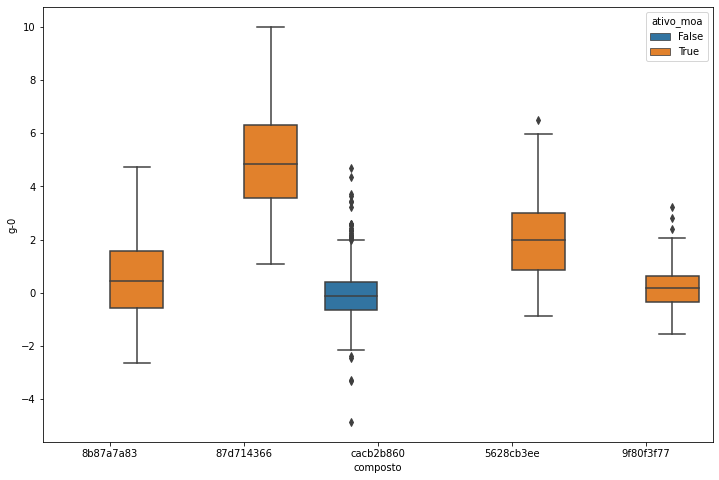

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
composto_principal = dados_combinados['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y= 'g-0', x='composto', hue='ativo_moa')


Analisando os boxplots, percebemos que temos algumas categorias com a mediana próxima de 0; temos outra com a mediana próxima de 5 e a outra próxima de 2.

É curioso observarmos também que o 3º boxplot, da esquerda para a direita, está bem concentrado; esse composto específico é na verdade o composto que nos indica que foi "com tratamento".

Outro ponto interessante é que o último boxplot tem um comportamento muito semelhante ao 3º; provavelmente a droga não modificou tanto assim o gene 0.

Agora é com você! Faça os desafios e nos encontramos na próxima aula.

##Aula 04

###Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

###Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

###Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

###Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html


###Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

###Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA 

###Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes


###Desafio 08: Resumo do que você aprendeu com os dados


# Desafio 1:

A primeira ideia que me surgiu foi renomear as colunas eliminando tudo que vem antes do "_". Porém acho que não funciona. A segundo ideia que tive foi usar a serie "contage_moa" e passar uma operação logia para saber se um trecho do nome pertence ao str. será que funciona? 

In [18]:
type(contagem_moa)

pandas.core.series.Series

In [19]:
contagem_moa_d = pd.DataFrame(data = contagem_moa)
contagem_moa_d.head()

,0
nfkb_inhibitor,832
proteasome_inhibitor,726
cyclooxygenase_inhibitor,435
dopamine_receptor_antagonist,424
serotonin_receptor_antagonist,404


In [20]:
contagem_moa_d.index

Index(['nfkb_inhibitor', 'proteasome_inhibitor', 'cyclooxygenase_inhibitor',
       'dopamine_receptor_antagonist', 'serotonin_receptor_antagonist',
       'dna_inhibitor', 'glutamate_receptor_antagonist',
       'adrenergic_receptor_antagonist', 'cdk_inhibitor', 'egfr_inhibitor',
       ...
       'calcineurin_inhibitor', 'atm_kinase_inhibitor',
       'nicotinic_receptor_agonist', 'retinoid_receptor_antagonist',
       'antiarrhythmic', 'protein_phosphatase_inhibitor',
       'autotaxin_inhibitor', 'diuretic', 'erbb2_inhibitor',
       'atp-sensitive_potassium_channel_antagonist'],
      dtype='object', length=206)

In [21]:
contagem_moa_d[contagem_moa_d.index.str.contains("inhibitor")].sum()[0]

9693

In [22]:
contagem_moa_d[contagem_moa_d.index.str.contains("antagonist")].sum()

0    3449
dtype: int64

O problema dessa forma é que eu não sei quais são todos os tipos. Só conheço o inhibitor, antagonist e agonist.


Uma forma que vi no discord talvez funcione melhor que foi usar um for para 

In [23]:
import numpy as np

In [24]:
# Pegar todos os tipos que temos (uma informação que eu não tinha só de olhar)
unique_moa_types = np.unique([col.split('_')[-1] for col in dados_resultados.drop(['id', 'n_moa', 'ativo_moa'],axis=1).columns])
unique_moa_types

array(['activator', 'agent', 'agonist', 'analgesic', 'antagonist',
       'anti-inflammatory', 'antiarrhythmic', 'antibiotic',
       'anticonvulsant', 'antifolate', 'antifungal', 'antihistamine',
       'antimalarial', 'antioxidant', 'antiprotozoal', 'antiviral', 'b',
       'blocker', 'diuretic', 'donor', 'immunosuppressant', 'inhibitor',
       'laxative', 'local', 'medium', 'scavenger', 'secretagogue',
       'sensitizer', 'steroid', 'stimulant'], dtype='<U17')

Desse ponto eu posso fazer manualmente de um por um com a ideia anterior. Mas provavelmente existe uma forta de fazer automaticamente.

In [25]:
frequencia = []
 #for tipo in unique_moa_types:
suporte  = contagem_moa_d[contagem_moa_d.index.str.contains("inhibitor")].sum()[0]
frequencia.append({'inhibitor' : suporte})
suporte  = contagem_moa_d[contagem_moa_d.index.str.contains("antagonist")].sum()[0]
frequencia.append({'antagonist' : suporte})
frequencia

[{'inhibitor': 9693}, {'antagonist': 3449}]

In [26]:
import operator
frequencia = {}
for tipo in unique_moa_types:
  suporte  = contagem_moa_d[contagem_moa_d.index.str.contains(tipo)].sum()[0]
  frequencia.update({tipo : suporte})

x = sorted(frequencia.items(), key=operator.itemgetter(1), reverse=True)
x[1:11]

[('inhibitor', 9693),
 ('agonist', 5779),
 ('antagonist', 3449),
 ('blocker', 323),
 ('agent', 150),
 ('activator', 115),
 ('local', 80),
 ('anti-inflammatory', 73),
 ('antioxidant', 73),
 ('immunosuppressant', 73)]

#Desafio 2:

In [27]:
# Primeito vamos testar a logica pra ver se tá okey.
(dados_combinados['tratamento'] == 'com_controle')

0        False
1        False
2        False
3        False
4        False
         ...  
23809    False
23810    False
23811     True
23812    False
23813    False
Name: tratamento, Length: 23814, dtype: bool

In [28]:
dados_combinados['tratamento_controle'] = (dados_combinados['tratamento'] == 'com_controle')
dados_combinados.tail(10)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tratamento_controle
23804,id_fff506720,com_droga,24,D1,74515bfd2,-1.0140,0.1709,-0.4291,1.8750,0.9859,0.3009,0.0650,-1.3920,-1.0410,1.4790,-0.4459,0.7377,-0.0037,-0.0995,-0.2393,-1.1670,-0.9359,1.1260,0.3450,-1.0780,2.7230,0.5255,0.6368,0.0000,-0.1172,0.8256,0.2120,2.1500,0.5925,-0.7637,0.1157,0.0919,-0.5855,-0.6233,-0.7982,...,-2.6910,-0.6001,-1.3260,-1.5960,-0.3137,-0.4209,-0.9542,-1.4760,-1.0180,-1.1360,0.1523,-1.0130,-0.4065,0.8502,-0.0978,-0.7339,-0.5680,-0.5700,0.7834,-2.5930,-2.1570,-0.7917,-0.9154,1.5140,-3.1070,-0.2346,-0.2662,-0.6730,0.3175,-1.5510,-1.2800,-0.7632,-0.6736,-0.4097,0.2282,-0.3213,-0.0836,0,False,False
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,-0.2392,-0.1774,-1.3980,-0.4059,0.1553,0.1083,-0.8020,-0.5039,-0.7167,-0.5016,-0.9369,-0.5864,-0.1009,0.8987,0.3389,-1.3460,-0.5087,-0.0892,-0.6559,0.0864,-0.6251,0.2471,-0.4523,-0.0389,1.0340,0.0796,-0.2560,-0.7851,-0.1687,-1.2890,...,0.2883,0.5843,0.0907,-0.9303,0.1981,0.6515,0.2877,0.4389,-0.3859,0.5203,-1.1070,2.3870,0.1820,-0.6434,-0.9722,-0.4200,-0.5693,1.0700,1.1110,-0.5117,-1.2130,0.3769,0.5296,1.0400,0.0587,1.0150,-0.7669,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302,1,True,False
23806,id_fff790a17,com_droga,48,D2,47dd8f190,-0.1150,-0.8037,0.0988,-0.1301,0.2013,0.9126,0.2234,0.8321,0.0486,-0.4505,0.3666,-0.0418,0.5645,0.4406,0.5708,-0.0984,1.2150,-0.0770,0.4057,0.7522,-0.3141,-0.2469,-0.5490,-0.1521,0.5957,-0.0912,0.4107,-0.0944,-0.1861,0.5627,-0.0437,-0.5673,0.2384,0.5478,0.3555,...,-0.5505,0.5671,0.2905,0.8563,-0.4375,0.3678,0.3119,0.4316,-0.6997,0.5957,0.1860,0.3508,0.2853,1.0110,0.0014,-0.2718,-0.1950,1.0390,-0.3072,0.8025,-0.1202,-1.0380,0.9099,0.2493,-0.7423,0.3864,1.2630,0.2358,0.1086,-0.1686,-0.3482,0.4121,0.5728,1.2630,0.7823,-0.6947,0.7277,0,False,False
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.5537,0.1063,0.3893,...,0.9227,-0.0460,0.3756,1.0730,-0.6904,0.9298,1.0500,0.4646,0.4481,0.9771,0.7187,0.5299,0.1079,1.2010,0.2529,-0.4546,0.7998,0.6401,-1.3370,0.6542,0.8561,0.4829,0.3213,-0.0177,-0.2656,0.4626,0.0030,0.8775,0.5230,0.1589,0.7715,0.5497,0.6929,0.3738,0.8636,0.4494,0.1218,1,True,False
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.2723,-0.3629,1.0820,...,0.6607,-0.1849,-0.6546,-0.5798,0.3449,-0.6208,0.2949,0.4158,0.8586,0.3868,1.0030,-0.4593,0.6498,0.8293,-0.7645,0.5379,0.5610,0.2577,-0.5493,0.2690,0.6392,-0.5774,-0.3393,0.5068,-0.2005,-0.4559,0.3734,0.0789,0.3538,0.0558,0.3377,-0.4753,-0.2504,-0.7415,0.8413,-0.4259,0.2434,1,True,False
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,

# Desafio 3:

Usar a mesma Logia do desafio anterior

In [29]:
(dados_combinados['tempo'] == 24)

0         True
1        False
2        False
3        False
4        False
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: tempo, Length: 23814, dtype: bool

In [30]:
(dados_combinados['tempo'] == 48)

0        False
1        False
2         True
3         True
4        False
         ...  
23809    False
23810    False
23811     True
23812    False
23813    False
Name: tempo, Length: 23814, dtype: bool

In [31]:
(dados_combinados['tempo'] == 72)

0        False
1         True
2        False
3        False
4         True
         ...  
23809    False
23810    False
23811    False
23812    False
23813     True
Name: tempo, Length: 23814, dtype: bool

In [32]:
dados_combinados['tempo_24'] = (dados_combinados['tempo'] == 24)
dados_combinados['tempo_48'] = (dados_combinados['tempo'] == 48)
dados_combinados['tempo_72'] = (dados_combinados['tempo'] == 72)
dados_combinados.head(10)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tratamento_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False,False,False,True
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,False,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,False,True,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False,False,False,True
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,1.2550,0.3359,-0.5103,-0.2993,-1.1950,-0.3208,-0.1187,1.0030,0.9133,0.0376,0.3015,-0.9578,0.5354,1.1360,1.1310,...,0.8918,0.4290,0.0716,0.8465,0.6596,1.3710,1.0580,1.7570,1.0030,0.2152,1.6920,-0.2930,1.4590,1.0950,0.5854,1.7270,0.5580,1.3090,1.0100,0.6980,0.5455,1.0170,1.2910,1.5430,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990,1,True,False,True,False,False
6,id_001bd861f,com_droga,24,D2

In [33]:
# Se errou alguma coisa kkkkkkk
#dados_combinados.rename(columns={'tempo_42': 'tempo_48'}, inplace = True)
#dados_combinados.drop(['tempo_24'], axis= 1)
#dados_combinados.pop('tempo_72')
#dados_combinados

# Desafio 4:

No link indicado temos Merge, join, concatenate e compare.

Apos a leitura da página temos o seguinte resumo:

### 1 - concat() 
A concat(): função que faz todo o trabalho pesado de realizar operações de concatenação ao longo de um eixo enquanto executa a lógica de conjunto opcional (união ou interseção) dos índices (se houver) nos outros eixos. É possivel haver apenas um único eixo de concatenação, para Séries.


### 2 - merge()
O pandas possui operações de junção in-memory full-features e de alto desempenho , idonologicamente muito semelhantes a bancos de dados relacionais como SQL. Esses métodos têm um desempenho significativamente melhor (em alguns casos, bem acima de uma ordem de magnitude melhor) do que outras implementações de código aberto (como base::merge.data.frame em R). A razão para isso é o design algorítmico cuidadoso e o layout interno dos dados em DataFrame.

Veja o livro de receitas para algumas estratégias avançadas.

Os usuários familiarizados com o SQL, mas novos no pandas, podem se interessar por uma comparação com o SQL .

O pandas fornece uma única função, merge()como ponto de entrada para todas as operações padrão de junção de banco de dados entre objetos DataFramenomeados ou Series.

### 3 - join()
O join()método relacionado é usado merge internamente para a junção índice no índice (por padrão) e coluna (s) no índice. Se você está ingressando no índice apenas, pode desejar usar o DataFrame.joinpara economizar um pouco de digitação.

DataFrame.join()é um método conveniente para combinar as colunas de dois potencialmente indexados de forma diferente DataFramesem um único resultado DataFrame. Aqui está um exemplo muito básico

### 4 - compare()

Os métodos compare() permitem comparar dois DataFrame ou Series, respectivamente, e resumir suas diferenças.

Este recurso foi adicionado na V1.1.0 .

# Desafio 5:

In [34]:
dados_combinados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
828099693       1
ba08ac4bc       1
57f5932fb       1
4d7280c91       1
42feaa183       1
Name: composto, Length: 3289, dtype: int64

Para analisar mais detalhadamente vamos usar o composto com maior frequencia (exeto o controle).

In [35]:
dados_combinados.query('composto == "87d714366"' )['ativo_moa'].value_counts()

True    718
Name: ativo_moa, dtype: int64

O primeiro ponto que vimos é que em todos os casos o composto "87d714366" ativou o MOA.

In [37]:
selecao_24 = (dados_combinados['composto'] == '87d714366') & (dados_combinados['tempo_24'] == True)
selecao_24.value_counts()

False    23579
True       235
dtype: int64

In [38]:
dados_combinados_d24 = dados_combinados[selecao_24]
dados_combinados_d24

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tratamento_controle,tempo_24,tempo_48,tempo_72
218,id_024a52260,com_droga,24,D2,87d714366,2.119,0.1098,1.1040,5.062,-0.7427,-0.3564,-0.8253,-3.6180,-1.127,-2.1360,-3.371,5.4820,0.0537,8.094,-1.3650,-1.4740,-4.1950,0.0338,-0.2759,0.3821,-0.6859,-2.6870,0.1784,-1.0710,-4.1710,1.5710,-1.9490,-1.0180,-4.7910,-5.3540,-5.922,2.569,-1.5100,-2.7960,3.0740,...,-6.681,-7.150,-6.109,-4.503,-10.000,-5.367,-5.762,-5.173,-1.988,-7.265,-6.1890,-5.044,-8.035,-4.652,-4.068,-6.564,-5.805,-8.420,-5.524,-6.696,-2.777,-3.348,-4.720,-5.357,-8.619,-7.332,-7.828,-9.679,-8.439,-2.047,-7.430,-5.861,-4.591,-3.533,2,True,False,True,False,False
359,id_03dd91d6c,com_droga,24,D1,87d714366,3.864,1.1390,0.8857,1.861,0.5814,-0.0786,-0.5178,-4.6610,-1.757,-1.0630,-4.651,1.6890,-1.1690,4.438,-0.3474,-3.2670,-1.8940,-1.5800,-0.2045,0.2008,-3.1790,-0.0727,-0.4256,-0.6506,-2.5680,0.9283,-2.5590,-0.7336,-2.3840,-3.0690,-3.477,2.880,-0.1036,-2.6860,3.0860,...,-6.335,-8.364,-6.093,-3.696,-9.982,-5.198,-9.425,-6.172,-2.158,-7.849,-5.6160,-7.463,-8.466,-3.690,-5.178,-6.502,-7.211,-9.223,-3.834,-8.287,-2.944,-3.220,-5.733,-5.411,-9.682,-8.465,-8.265,-10.000,-7.994,-2.828,-8.393,-6.245,-4.745,-3.879,2,True,False,True,False,False
428,id_0481e7f4b,com_droga,24,D2,87d714366,4.242,0.8118,0.0284,1.994,0.7662,0.2544,2.7680,-4.5760,0.000,-3.6820,-3.651,2.3990,3.0720,5.641,-0.9804,-1.7450,-5.9060,1.5820,-0.1410,1.4290,-3.1510,0.1125,-2.7350,-1.5550,-8.3640,-1.8160,-4.3200,1.7400,-4.7180,-4.2250,-7.353,10.000,0.0448,-3.6350,-0.3961,...,-6.038,-8.927,-7.009,-4.340,-10.000,-4.705,-5.746,-6.833,-2.362,-7.422,-5.3260,-3.280,-8.735,-3.586,-6.341,-7.249,-6.793,-7.806,-5.646,-5.612,-4.512,-2.913,-4.930,-4.634,-8.727,-9.347,-7.327,-9.002,-9.361,-3.357,-8.400,-6.582,-4.998,-3.371,2,True,False,True,False,False
622,id_065985006,com_droga,24,D2,87d714366,2.887,-0.0221,1.6920,5.052,-0.5128,-0.8011,1.5600,-3.1920,-3.489,-3.1050,-3.580,5.6660,4.0070,7.102,-1.2980,-0.3544,-3.1250,-3.4260,0.7480,2.3310,-0.4135,-3.2280,-0.9854,-0.7886,-4.9210,0.2621,-3.7960,-1.1950,-3.6170,-2.2720,-4.189,6.323,-2.0560,-2.3020,3.0100,...,-5.723,-7.621,-4.974,-3.544,-9.795,-5.147,-7.417,-4.926,-3.133,-7.282,-6.6480,-5.249,-7.361,-4.096,-6.330,-6.011,-3.347,-6.779,-4.615,-6.266,-3.048,-2.616,-4.463,-6.417,-9.236,-8.122,-6.528,-9.988,-7.887,-2.669,-7.663,-5.696,-4.980,-3.989,2,True,False,True,False,False
670,id_06c151919,com_droga,24,D2,87d714366,1.288,-1.1120,8.2570,4.508,-0.3912,-1.4320,-1.5580,-2.8290,-1.031,-0.2956,-1.533,4.8700,2.6820,4.839,1.4860,-1.4020,-1.9010,0.2710,0.3217,0.3774,-2.0380,-3.3270,0.3184,-4.0420,-3.1180,0.5215,-0.2539,0.1617,-4.5130,-4.2500,-3.091,3.696,-1.1590,-3.8800,1.7200,...,-5.421,-5.714,-6.650,-4.000,-9.740,-5.474,-7.212,-5.040,-2.381,-6.468,-4.6720,-6.070,-6.791,-3.403,-6.297,-4.449,-5.432,-7.762,-3.929,-5.018,-1.621,-3.206,-3.621,-6.230,-10.000,-7.476,-7.122,-8.872,-6.709,-3.219,-9.208,-5.505,-3.954,-3.234,2,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23386,id_fb57829c1,com_droga,24,D1,87d714366,1.772,0.8781,-0.0984,3.729,0.4621,-0.1688,1.0660,-3.6130,-2.104,-4.4690,-5.284,1.3990,-0.1906,6.753,-0.1104,-0.5587,-0.6843,-6.1210,-0.0439,0.3555,0.7403,0.5085,-1.2910,-2.6080,-4.2000,0.8594,-3.4270,-2.6460,-0.8448,-3.3060,-1.485,1.715,-1.7000,-0.7383,1.6890,...,-4.676,-4.406,-5.369,-3.450,-9.453,-3.922,-4

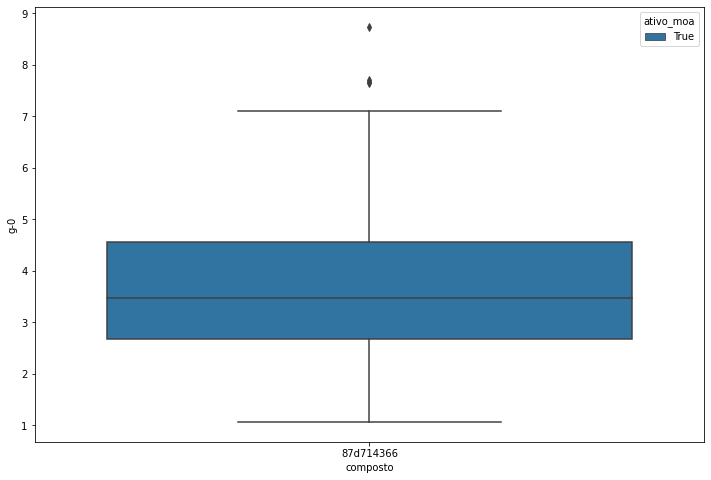

In [39]:
composto_principal_d = dados_combinados_d24['composto'].value_counts().index[:]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados_d24.query('composto in @composto_principal_d'), y= 'g-0', x='composto', hue='ativo_moa')

In [40]:
selecao_48 = (dados_combinados['composto'] == '87d714366') & (dados_combinados['tempo_48'] == True)
selecao_48.value_counts()

False    23567
True       247
dtype: int64

In [41]:
dados_combinados_d48 = dados_combinados[selecao_48]
dados_combinados_d48

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tratamento_controle,tempo_24,tempo_48,tempo_72
16,id_002fb9c19,com_droga,48,D1,87d714366,8.738,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.486,-2.5790,-6.747,3.6150,-1.451,0.6909,-0.7623,-2.9400,-9.285,-6.7110,-0.4195,1.1600,-1.318,1.3660,-1.4020,-2.6220,0.7204,-2.593,-4.063,-0.8282,-3.500,0.9206,-5.1450,9.804,-2.6840,-2.4390,-0.1427,...,-10.000,-10.000,-10.000,-8.887,-10.000,-10.000,-10.000,-10.000,-4.902,-9.984,-5.552,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.796,-8.177,-9.899,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-6.784,2,True,False,False,True,False
76,id_00cf039a7,com_droga,48,D2,87d714366,4.546,0.4257,0.7670,2.1950,2.5960,0.3677,-0.3854,-1.1590,-8.180,-2.1310,-4.168,2.5630,-1.341,5.2610,-2.5680,1.0840,-3.835,-4.8440,0.8522,0.2435,-2.609,0.3067,0.9733,-1.6080,-2.9210,-1.957,-2.644,2.4030,-3.036,-6.4520,-3.2580,4.355,-0.7562,0.9930,-0.2854,...,-8.504,-8.528,-9.995,-6.254,-9.995,-6.955,-9.995,-9.743,-3.457,-8.712,-3.972,-8.709,-10.000,-8.461,-9.347,-8.698,-9.807,-10.000,-10.000,-10.000,-5.657,-5.513,-8.284,-9.490,-8.729,-10.000,-7.834,-9.538,-10.000,-8.520,-10.000,-7.436,-6.918,-5.235,2,True,False,False,True,False
246,id_028b6d60d,com_droga,48,D1,87d714366,6.783,-0.0079,1.1780,1.2530,2.9560,-0.5525,0.5921,-3.8070,-5.900,-1.9590,-7.095,-0.5689,-2.731,7.2450,-5.3630,-0.0345,-3.151,-3.4490,0.4162,-0.6517,-2.406,-1.0190,0.9068,0.1723,-7.3540,-1.459,-2.339,2.0580,-1.441,-3.6410,-4.0160,5.085,-1.4470,-2.2580,-1.1850,...,-9.630,-9.654,-10.000,-7.280,-10.000,-8.786,-10.000,-10.000,-4.037,-10.000,-7.514,-10.000,-10.000,-9.127,-10.000,-8.333,-10.000,-10.000,-10.000,-10.000,-7.406,-5.842,-10.000,-9.576,-9.291,-10.000,-8.731,-10.000,-10.000,-8.275,-10.000,-9.517,-7.746,-5.204,2,True,False,False,True,False
249,id_0290cfd3b,com_droga,48,D1,87d714366,6.812,1.8160,0.8443,1.2120,3.3800,-0.4263,0.0578,-4.7500,-6.099,-0.4453,-2.542,0.5382,-0.921,2.7790,-2.9130,-1.7540,-4.551,-5.7640,0.1939,-2.4260,-4.896,-2.2920,-0.5705,-0.5361,-3.7980,-1.080,-2.621,3.0890,-3.535,3.6570,-1.5360,5.220,-5.6030,-0.4182,-0.9178,...,-8.288,-8.877,-8.115,-4.955,-10.000,-7.898,-7.367,-8.783,-2.266,-8.339,-3.953,-8.160,-9.332,-4.549,-7.108,-7.538,-8.496,-9.573,-6.877,-8.765,-4.608,-4.419,-7.990,-8.152,-7.768,-9.036,-8.111,-9.788,-7.819,-5.273,-8.208,-6.985,-6.749,-3.403,2,True,False,False,True,False
336,id_039ec0a59,com_droga,48,D1,87d714366,5.154,-1.7400,0.5219,0.3595,0.1646,-0.5382,3.0430,-4.4580,-6.058,-1.1300,-4.549,3.0570,-0.172,6.6670,-4.4530,-2.1320,-4.743,-2.9920,-0.1183,-1.3420,-1.444,-1.2520,-2.4650,-3.2140,0.7104,-2.438,-5.196,2.4470,-4.301,-1.4570,-4.0930,9.198,-2.1380,2.6800,-2.1680,...,-9.995,-9.994,-9.995,-8.419,-9.995,-9.870,-9.995,-9.995,-4.310,-8.922,-6.414,-9.292,-9.623,-9.994,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-7.416,-8.902,-10.000,-10.000,-10.000,-10.000,-9.976,-10.000,-10.000,-7.458,-10.000,-10.000,-10.000,-6.277,2,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23309,id_fa6ea2aee,com_droga,48,D1,87d714366,4.629,-1.1870,0.3670,-0.0881,3.3290,0.2196,1.7970,-7.1370,-10.000,-3.7640,-3.897,0.9625,-4.364,4.9050,-7.0180,-1.1380,-6.821,-6.6050,-0.9261,-3.8580,-2.251,-1.7230,-4.5810,-2.3890,3.5510,-1.826,-2.254,1.1150,-4.603,6.3780,0.4405,5.102,-5.3550,0.1744,-2.8570,...,-9.259,-10.000,-9.646

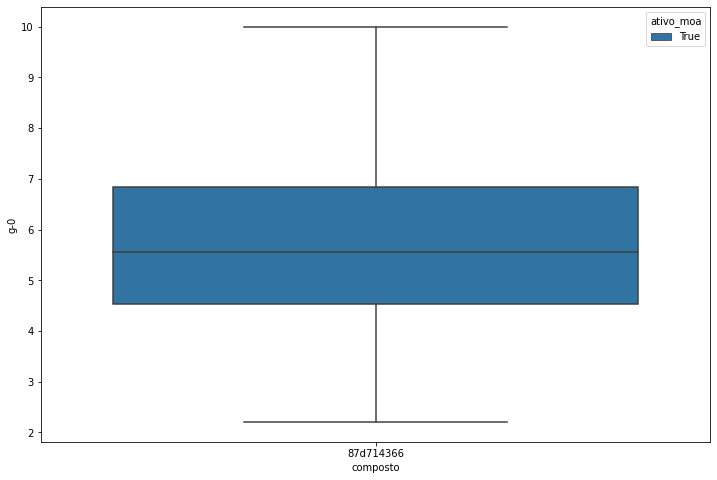

In [42]:
composto_principal_d2 = dados_combinados_d48['composto'].value_counts().index[:]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados_d48.query('composto in @composto_principal_d2'), y= 'g-0', x='composto', hue='ativo_moa')

In [43]:
selecao_72 = (dados_combinados['composto'] == '87d714366') & (dados_combinados['tempo_72'] == True)
selecao_72.value_counts()

False    23578
True       236
dtype: int64

In [44]:
dados_combinados_d72 = dados_combinados[selecao_72]
dados_combinados_d72

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tratamento_controle,tempo_24,tempo_48,tempo_72
119,id_01534c4ee,com_droga,72,D2,87d714366,10.000,-1.2200,1.5150,-2.1910,4.353,-0.9594,2.5600,-3.3120,-9.507,-3.393,-4.160,-2.9320,0.0000,2.2650,-6.256,0.1147,-4.209,-3.558,3.2920,0.1551,-3.720,0.1069,1.3000,1.9710,-9.9350,-1.8340,-1.072,0.2092,-1.989,-4.0390,-6.047,8.404,3.1040,-3.3390,-2.8780,...,-9.513,-9.832,-9.978,-6.568,-9.978,-8.664,-9.978,-9.978,-4.073,-10.000,-5.163,-7.797,-10.000,-8.297,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.019,-8.688,-9.658,-9.308,-10.000,-10.000,-7.703,-10.000,-10.000,-9.054,-10.000,-8.771,-9.694,-5.548,2,True,False,False,False,True
209,id_0236e3425,com_droga,72,D1,87d714366,3.612,-1.7130,0.0313,-1.7360,3.355,-1.7040,2.6010,-1.4530,-9.534,-2.873,-4.465,-0.4308,-1.7920,3.8900,-3.491,0.6124,-3.504,-4.445,-1.4690,-2.8590,-1.409,0.1560,-3.1610,-1.5710,0.0587,-0.0839,-3.619,-0.2986,-2.164,-2.1390,-3.929,7.451,-1.0450,4.2260,-3.5800,...,-10.000,-9.553,-10.000,-7.088,-10.000,-10.000,-10.000,-10.000,-4.432,-10.000,-6.025,-8.882,-10.000,-8.023,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.517,-7.589,-10.000,-10.000,-10.000,-10.000,-8.451,-10.000,-10.000,-8.695,-10.000,-8.559,-8.025,-6.642,2,True,False,False,False,True
289,id_03033f263,com_droga,72,D1,87d714366,3.005,-1.5180,0.3803,-1.3970,3.281,-4.9960,2.6310,-4.0490,-10.000,-3.143,-4.687,1.2350,0.5788,5.4400,-3.173,0.2785,-2.832,-4.999,-0.8461,-4.5160,-3.172,-0.1054,-3.5800,-1.8520,-2.7410,2.1960,-3.843,2.0300,-1.375,-2.1340,-3.917,8.535,-2.4700,7.3420,-3.3770,...,-10.000,-10.000,-10.000,-8.435,-10.000,-10.000,-10.000,-10.000,-4.981,-10.000,-5.609,-9.809,-10.000,-9.716,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-9.540,-9.948,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-9.892,-10.000,-9.649,-8.753,-7.137,2,True,False,False,False,True
348,id_03bdbab43,com_droga,72,D1,87d714366,4.355,-1.4380,0.5989,0.3048,3.365,0.1971,0.5886,-1.1490,-7.976,-2.872,-4.562,0.9842,-1.3720,4.5980,-2.196,1.5180,-3.378,-5.756,-1.4690,0.0882,-4.476,-1.2940,-0.6524,-3.0650,-2.4300,-1.7920,-1.740,-1.0010,-3.096,-2.8180,-4.776,5.715,0.3260,2.6240,-1.3550,...,-9.955,-9.955,-9.955,-7.544,-9.955,-9.955,-9.955,-9.955,-5.112,-10.000,-5.755,-10.000,-10.000,-9.420,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.546,-9.259,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-9.327,-9.088,-7.333,2,True,False,False,False,True
397,id_04372d73c,com_droga,72,D2,87d714366,8.499,1.9470,2.8640,-0.7456,5.687,-0.8448,-2.0320,-2.5960,-9.225,-3.471,-4.504,1.9340,-3.9620,3.7280,-8.909,0.5639,-5.963,-4.590,1.6290,-0.1217,-5.641,-1.2830,0.6772,0.2391,-9.0530,-3.3290,-4.010,5.9160,-5.212,-8.3320,-7.200,9.363,-1.1750,0.3676,-1.2120,...,-10.000,-10.000,-10.000,-8.359,-10.000,-10.000,-10.000,-10.000,-5.553,-9.697,-5.442,-9.889,-9.889,-9.889,-9.889,-9.889,-9.889,-9.889,-9.889,-9.889,-9.560,-9.889,-8.993,-9.889,-9.889,-9.889,-9.889,-9.889,-9.889,-9.889,-9.889,-9.550,-9.889,-8.033,2,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23434,id_fbe76bd40,com_droga,72,D2,87d714366,2.488,1.8250,0.7779,0.0931,3.977,-4.4900,-1.1290,0.5557,-10.000,-1.631,-2.523,-0.3697,-1.0060,0.0605,-1.945,0.9234,-5.450,-9.182,-1.0140,-0.9146,-6.350,1.5060,2.1770,-2.3590,-1.1210,-1.5420,-1.812,-0.6745,-4.038,-5.9190,-4.329,10.000,1.8110,0.6676,-0.5084,...

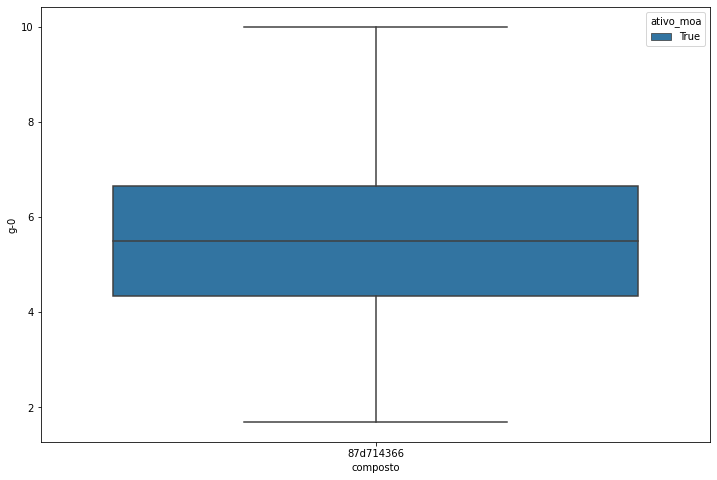

In [45]:
composto_principal_d3 = dados_combinados_d72['composto'].value_counts().index[:]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados_d72.query('composto in @composto_principal_d3'), y= 'g-0', x='composto', hue='ativo_moa')

In [56]:
composto = dados_combinados[dados_combinados['composto']=='87d714366']
controle = dados_combinados[dados_combinados['tratamento']=='com_controle']

Text(0.5, 1.0, 'Controle')

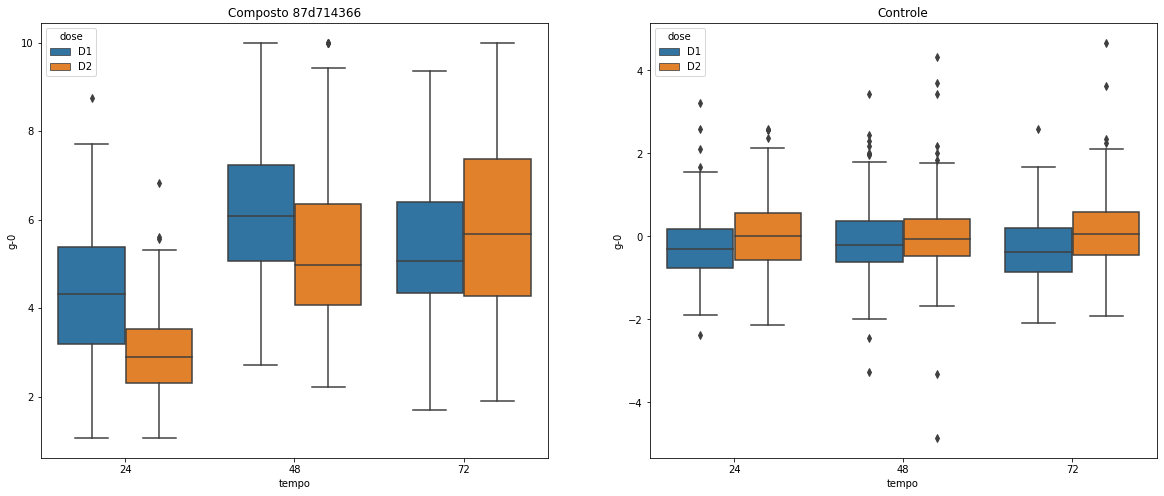

In [57]:
fig, axs = plt.subplots(1,2,figsize=(20,8))

sns.boxplot(data=composto,y='g-0', x='tempo', hue='dose',ax=axs[0])
axs[0].set_title('Composto 87d714366')
sns.boxplot(data=controle,y='g-0', x='tempo', hue='dose',ax=axs[1])
axs[1].set_title('Controle')

# Desafio 6:

Para esse desafio vamos usar a função nunique(). ela retorna series com número de observações distintas. Em outras palavras, se a mesma droga tem uma variação com o numero de MOA nessa função ela vai retornar com um valor diferente de 1.

ref 1: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html


ref2: https://github.com/gnserafim/ImersaoDados_Alura/blob/main/Aula_04_GabrielSerafim.ipynb

In [65]:
selecao_moa_nunique = dados_combinados.groupby(by='composto')['ativo_moa'].nunique()
selecao_moa_nunique

composto
00199ff52    1
00251fc41    1
00321ea80    1
0034c0847    1
0060e686f    1
            ..
ff9565933    1
ffd66e220    1
ffe357f8f    1
ffed8e1c9    1
fff7d208d    1
Name: ativo_moa, Length: 3289, dtype: int64

Feito essa seleção agora precisamos varrer a selecao para saber se temos valores diferente de 1.

In [66]:
aux = 0
for i in range(len(selecao_moa_nunique)):
  if selecao_moa_nunique[i] != 1:
    aux += 1
    print(selecao_moa_nunique[i].index)
if aux == 0:
  print('Não houve variação na ativação do MOA alterando as variaveis para uma mesma droga/composto')


Não houve variação na ativação do MOA alterando as variaveis para uma mesma droga/composto


# Desafio 7:

Aqui vamos usar a mesma ideia do item anterios. Porém o parametro para analise agora é o n_moa.

Um detalhe é que eu isolei no desafio 5 uma droga, a cara que apareceu foi os mesmo MOA e ativação. Então crio a hipotese de que isso seria pra todas as drogas. Será?

In [64]:
selecao_moa2_nunique = dados_combinados.groupby(by='composto')['n_moa'].nunique()
selecao_moa2_nunique

composto
00199ff52    1
00251fc41    1
00321ea80    1
0034c0847    1
0060e686f    1
            ..
ff9565933    1
ffd66e220    1
ffe357f8f    1
ffed8e1c9    1
fff7d208d    1
Name: n_moa, Length: 3289, dtype: int64

In [67]:
aux = 0
for i in range(len(selecao_moa2_nunique)):
  if selecao_moa2_nunique[i] != 1:
    aux += 1
    print(selecao_moa2_nunique[i].index)
if aux == 0:
  print('Não houve variação do MOA alterando as variaveis para uma mesma droga/composto')

Não houve variação do MOA alterando as variaveis para uma mesma droga/composto


Concluimos que independente das variaveis o MOA e sua ativação será a mesma.

# Desafio 08:

Na aula 4 nós começamos a analisar os dados de resultado, outra base de dados. Importamos e analisamos essa base de dados. Ela se trata de dados com os tipos de influencias que a droga fez em certo gene ou célula. Para melhor analise criamos novas colunas e mesclamos essas colunas com a base de dados que já estávamos trabalhando. Agora temos informações mais completas. Então fizemos analises com o numero MOA e sua ativação.